In [179]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


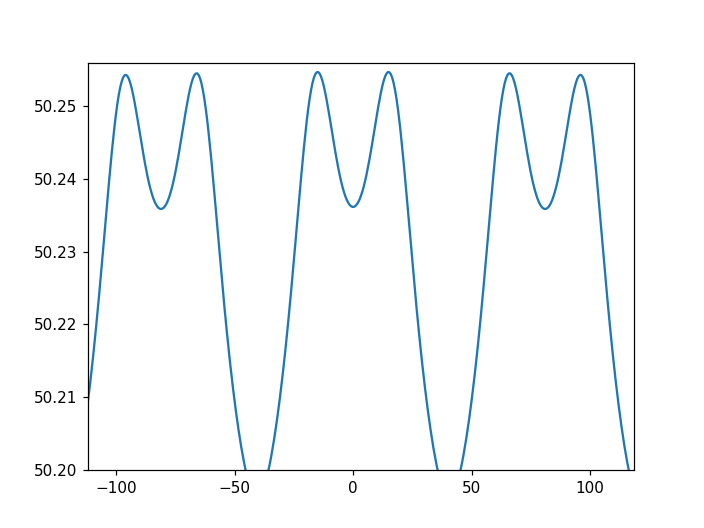

In [297]:
def single_spectrum(deltas, gamma, trap_freq, beta_0, order, offset, A):
    P = np.zeros(len(deltas))
    y_values = []
    for detuning in deltas:
        tmp = 0
        for n in range(-1*order, order):
            tmp += A*scipy.special.jn(n,beta_0)**2 / ((detuning - offset + n*trap_freq)**2 + (gamma/2 + 0.1*gamma*beta_0)**2)
        y_values.append(tmp)
    return y_values

def repeated_spectrum(deltas, gamma, trap_freq, beta_0, order, A, y_offset):
    Y_array = []
    for i in range(-5,6):
        y_values = single_spectrum(deltas, gamma, trap_freq, beta_0, order, i*81, A)
        Y_array.append(y_values)
    tot_y = np.zeros(1000)
    for array in Y_array:
        tot_y += array
    return tot_y + y_offset

deltas = np.linspace(-300, 300, 1000)
gamma = 20
trap_freq = 48.5
beta_0 = 3.2
order = 10
A = 100.0
y_offset = 50.0
total = repeated_spectrum(deltas, gamma, trap_freq, beta_0, order, A, y_offset)
plt.plot(deltas, total)

<IPython.core.display.Javascript object>


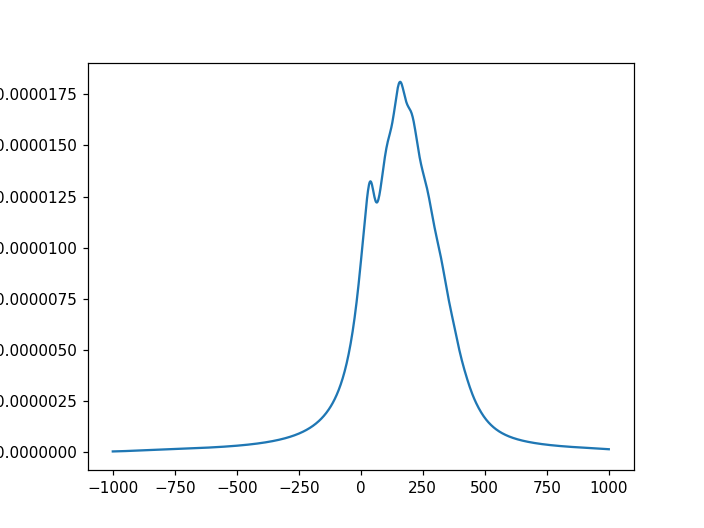

In [146]:
con = np.convolve(Y_array[0], Y_array[1], 'same')
plt.plot(deltas, con)

In [4]:
import scipy

<IPython.core.display.Javascript object>


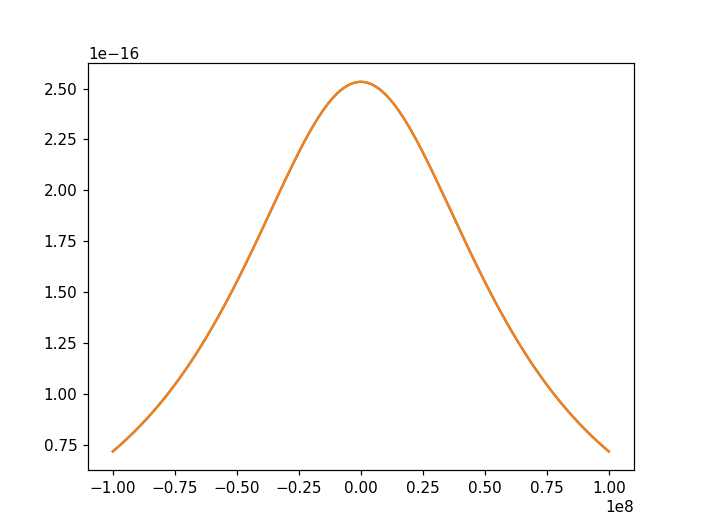